In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("All libraries imported successfully!")


All libraries imported successfully!


In [2]:
# Load the dataset with latin-1 encoding
df = pd.read_csv('AB_NYC_2019.csv', index_col=False)

# Display basic information
print("=" * 60)
print("DATASET SHAPE & BASIC INFO")
print("=" * 60)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

print("Column Names & Data Types:")
print(df.dtypes)

print("\n" + "=" * 60)
print("FIRST 5 ROWS")
print("=" * 60)
print(df.head())

print("\n" + "=" * 60)
print("DATASET INFO")
print("=" * 60)
df.info()




DATASET SHAPE & BASIC INFO
Shape: 48895 rows × 16 columns

Column Names & Data Types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

FIRST 5 ROWS
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3

MISSING VALUES ANALYSIS
                              Column  Missing_Count  Missing_Percentage  \
reviews_per_month  reviews_per_month          10052               20.56   
last_review              last_review          10052               20.56   
host_name                  host_name             21                0.04   
name                            name             16                0.03   

                  Data_Type  
reviews_per_month   float64  
last_review          object  
host_name            object  
name                 object  


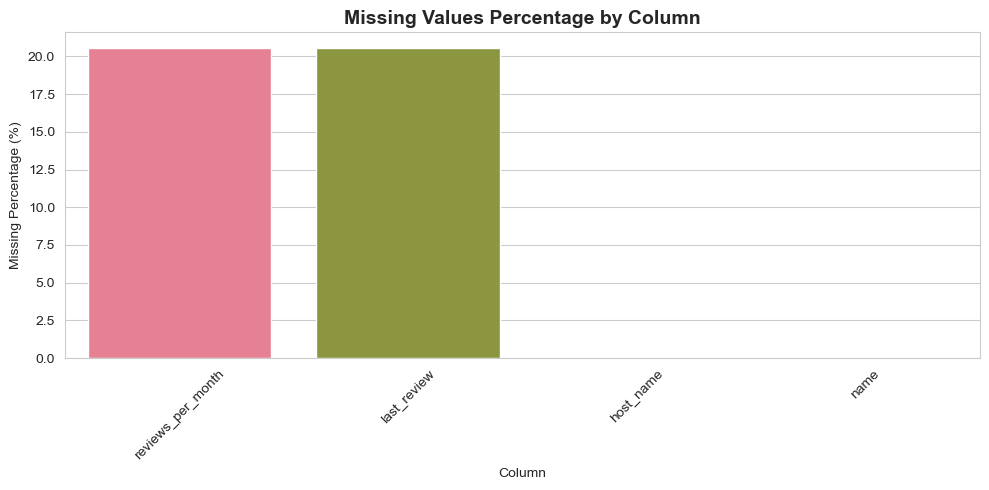

In [3]:
# Comprehensive missing value analysis
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type': df.dtypes
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)

# Visualize missing values
if len(missing_data) > 0:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=missing_data, x='Column', y='Missing_Percentage', palette='husl')
    plt.title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.ylabel('Missing Percentage (%)')
    plt.tight_layout()
    plt.savefig('01_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()


In [4]:
# Create a copy for cleaning
df_clean = df.copy()

# 1. Handle missing values
print("Handling missing values...")

df_clean['last_review'] = df_clean['last_review'].fillna('No reviews')
df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)
df_clean['name'] = df_clean['name'].fillna('Unnamed Listing')

print("Missing values handled\n")

# 2. Remove duplicates
print("Removing duplicates...")
duplicates_before = len(df_clean)
df_clean = df_clean.drop_duplicates(subset=['id'], keep='first')
duplicates_removed = duplicates_before - len(df_clean)
print(f"Removed {duplicates_removed} duplicate rows\n")

# 3. Handle outliers in price
print("Handling outliers...")

Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Price Range (IQR Method): ${lower_bound:.2f} - ${upper_bound:.2f}")
print(f"Listings outside range: {len(df_clean[(df_clean['price'] < lower_bound) | (df_clean['price'] > upper_bound)])}")

df_clean['is_outlier'] = ((df_clean['price'] < lower_bound) | (df_clean['price'] > upper_bound))
print(f"Outliers flagged\n")

# 4. Data type conversions
print("Data type conversions...")
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'], errors='coerce')
df_clean['id'] = df_clean['id'].astype(str)
print("Data types converted\n")

# Save cleaned data
df_clean.to_csv('airbnb_cleaned.csv', index=False)
print("Cleaned data saved!")

print("\n" + "=" * 60)
print("CLEANING SUMMARY")
print("=" * 60)
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")


Handling missing values...
Missing values handled

Removing duplicates...
Removed 0 duplicate rows

Handling outliers...
Price Range (IQR Method): $-90.00 - $334.00
Listings outside range: 2972
Outliers flagged

Data type conversions...
Data types converted

Cleaned data saved!

CLEANING SUMMARY
Original shape: (48895, 16)
Cleaned shape: (48895, 17)
Rows removed: 0
